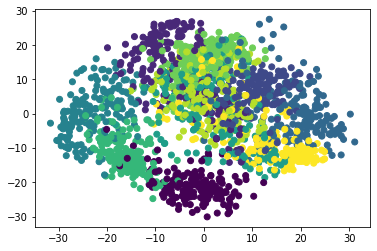

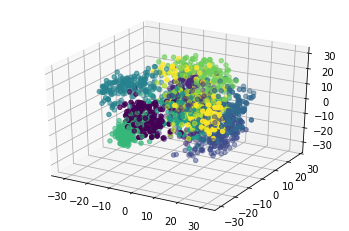

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

#加载数据
digits = load_digits()
x_data = digits.data #数据
y_data = digits.target #标签

#切分数据为训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data)

#创建模型 并训练
mlp = MLPClassifier(hidden_layer_sizes=(100,50),max_iter=500)
mlp.fit(x_train,y_train)

#数据中心化
def zeroMean(dataMat):
    #按列求平均，即各个特征的平均
    meanVal = np.mean(dataMat,axis=0)
    newData = dataMat - meanVal
    return newData,meanVal

#PCA算法
def pca(dataMat,n):
    #数据中心化
    newData,meanVal = zeroMean(dataMat)
    
    #np.cov 用于求协方差矩阵，参数rowvar=0说明数据一行代表一个样本
    covMat = np.cov(newData,rowvar=0)
    
    #np.linalg.eig求矩阵的特征值和特征向量
    eigVals,eigVects = np.linalg.eig(np.mat(covMat))
    
    #对特征值从小到大排序
    eigValIndice = np.argsort(eigVals)
    
    #最大的n个特征值的下标
    n_eigValIndice = eigValIndice[-1:-(n+1):-1]
    
    #最大的n个特征值对应的特征向量
    n_eigVect = eigVects[:,n_eigValIndice]
    
    #低维特征空间的数据
    lowDDataMat = newData*n_eigVect
    
    #利用低维数据重构数据
    reconMat = (lowDDataMat*n_eigVect.T) + meanVal
    
    return lowDDataMat,reconMat #返回低维特征空间的数据和重构的矩阵

lowDDataMat,reconMat = pca(x_data,2)


##预测
predictions = mlp.predict(x_data)

#重构的数据
x = np.array(lowDDataMat)[:,0]
y = np.array(lowDDataMat)[:,1]

plt.scatter(x,y,c=y_data)
plt.show()


### ----------------- 3维 -----------------
lowDDataMat,reconMat = pca(x_data,3)
#重构的数据
x = np.array(lowDDataMat)[:,0]
y = np.array(lowDDataMat)[:,1]
z = np.array(lowDDataMat)[:,2]

ax = plt.figure().add_subplot(111,projection='3d')
ax.scatter(x,y,z,c=predictions)
plt.show()